In [2]:
import os

import pandas as pd

In [3]:
# filter files starting with a given prefix and ending with a given suffix
def filter_files(prefix, suffix, files):
    return [f for f in files if f.startswith(prefix) and f.endswith(suffix)]

In [ ]:
results_dir = "./results/"
files = os.listdir(results_dir)
files

In [ ]:
res_2ap = filter_files("res", "_2ap.xlsx", files)
res_2ap

In [ ]:
import re


def extract_model_name(filename):
    match = re.search(r"_(\w+)_", filename)
    return match.group(1) if match else None


data_dict = {}
for f in res_2ap:
    data_dict[extract_model_name(f)] = pd.read_excel(results_dir + f, sheet_name=None)

len(data_dict)

In [ ]:
data_dict["catboost"]["best_params"]

In [ ]:
data_dict["catboost"]["r2"]

In [ ]:
best_mean_r2 = 0
best_model = None
best_params = None
mean_r2_dict = {}
for model, data in data_dict.items():
    mean_r2 = data["r2"]["test"].mean()
    mean_r2_dict[model] = mean_r2
    # print(f"{model}: {mean_r2}")
    if mean_r2 > best_mean_r2:
        best_mean_r2 = mean_r2
        best_model = model
        best_params = data["best_params"].set_index("Parameter")["Value"].to_dict()

mean_r2_dict

In [10]:
mean_r2_dict["lightgbm"] = 0.92

In [11]:
for k, v in best_params.items():
    if pd.isna(v):
        best_params[k] = None

# del best_params["early_stopping_round"]

best_params["early_stopping_round"] = None

In [ ]:
from modeling_old import clear_column_names


def load_data(path="./df_2ap_final.csv"):
    df = pd.read_csv(path, header=[0, 1], index_col=None)

    y = df[("seq_time", "_")]
    X = df.drop(columns=[("seq_time", "_")])

    X.columns = clear_column_names(X)

    return X, y


X, y = load_data()
X_test, y_test = load_data("./df_1_2ap_test_final.csv")
X.shape, X_test.shape

In [13]:
# from modeling_old import regressor_final

# r = regressor_final(model_type=best_model, params=best_params, suffix="2ap")
# r.fit(X, y)

In [14]:
# r.plot_fit_error(X, y)

In [ ]:
# all_best_params = {}
# for model, data in data_dict.items():
#     best_params = data["best_params"].set_index("Parameter")["Value"].to_dict()
#     for k, v in best_params.items():
#         if pd.isna(v):
#             best_params[k] = None
#     all_best_params[model] = best_params

# all_best_params

all_best_params = {
    "catboost": {
        "iterations": 100,
        "depth": 4,
        "learning_rate": 0.1,
        "l2_leaf_reg": 3,
        "loss_function": "RMSE",
        "bootstrap_type": "MVS",
    },
    "extra_trees": {"n_estimators": 50, "max_features": None, "max_depth": 10},
    "xgboost": {
        "objective": "reg:squarederror",
        "n_estimators": 50,
        "max_depth": None,
        "learning_rate": 0.2,
    },
    "mlp": {"hidden_size1": 64, "hidden_size2": 32, "weight_decay": 0.001},
    "lightgbm": {
        "n_estimators": 200,
        "learning_rate": 0.1,
        "max_depth": None,
        "objective": "regression",
        "metric": "rmse",
        "num_leaves": 31,
        "min_data_in_leaf": 20,
        "feature_fraction": 0.9,
        "early_stopping_round": None,
    },
    "random_forest": {"n_estimators": 200, "max_features": None, "max_depth": 10},
}
all_best_params_sorted = sorted(all_best_params.items(), key=lambda x: x[0])

best_model, all_best_params_sorted

In [ ]:
# import matplotlib.pyplot as plt
# from modeling_old import model_selection
# from sklearn.model_selection import KFold

# model, _ = model_selection(
#     model_type=best_model,
#     params=all_best_params[best_model],
#     random_state=42,
#     input_size=X.shape[1],
# )
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # 存储每次折叠的预测误差
# errors = []

# # K折交叉验证
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     error = y_test - y_pred
#     errors.append(error)

# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# plt.boxplot(errors, labels=[f"Fold {i+1}" for i in range(len(errors))])
# plt.title(
#     f"{model.__class__.__name__} Error Distribution per Fold in K-Fold Cross Validation"
# )
# plt.xlabel("Fold")
# plt.ylabel("Prediction Error")
# # 去除上、右边框
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

# # 保存图形
# plt.savefig("./fig/q1_2ap_boxplot.svg")

# plt.show()

0:	learn: 9.9044511	total: 51.5ms	remaining: 5.1s
1:	learn: 9.2671743	total: 54.5ms	remaining: 2.67s
2:	learn: 8.6284191	total: 57.8ms	remaining: 1.87s
3:	learn: 8.0234818	total: 59.8ms	remaining: 1.43s
4:	learn: 7.5212208	total: 61.7ms	remaining: 1.17s
5:	learn: 7.0659610	total: 63.5ms	remaining: 995ms
6:	learn: 6.6391300	total: 66ms	remaining: 877ms
7:	learn: 6.2979213	total: 68.5ms	remaining: 788ms
8:	learn: 6.0201283	total: 70.8ms	remaining: 716ms
9:	learn: 5.7285073	total: 73.4ms	remaining: 660ms
10:	learn: 5.4874789	total: 75.2ms	remaining: 608ms
11:	learn: 5.2519995	total: 77ms	remaining: 565ms
12:	learn: 5.0289587	total: 78.5ms	remaining: 525ms
13:	learn: 4.8510916	total: 80.9ms	remaining: 497ms
14:	learn: 4.7066355	total: 82.7ms	remaining: 469ms
15:	learn: 4.5793137	total: 84.6ms	remaining: 444ms
16:	learn: 4.4597992	total: 85.9ms	remaining: 420ms
17:	learn: 4.3601424	total: 88.5ms	remaining: 403ms
18:	learn: 4.2324065	total: 90.9ms	remaining: 388ms
19:	learn: 4.1296790	total:

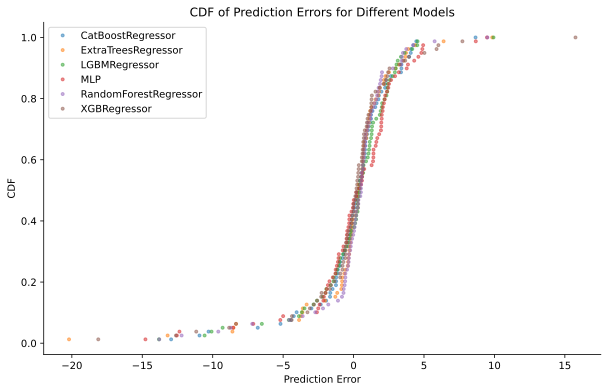

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from modeling_old import model_selection
from sklearn.model_selection import train_test_split

plt.figure(figsize=(10, 6))

# 遍历所有模型及其参数
for model_type, params in all_best_params_sorted:
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 选择并训练模型
    model, _ = model_selection(
        model_type=model_type,
        params=params,
        random_state=42,
        input_size=X.shape[1],
    )
    model.fit(X_train, y_train)

    # 进行预测
    y_pred = model.predict(X_test)

    # 计算误差
    errors = y_test - y_pred

    # 计算误差的 CDF
    sorted_errors = np.sort(errors)
    cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

    # 绘制 CDF
    plt.plot(
        sorted_errors,
        cdf,
        marker=".",
        linestyle="none",
        alpha=0.5,
        label=model.__class__.__name__,
    )

# 图形设置
plt.title("CDF of Prediction Errors for Different Models")
plt.xlabel("Prediction Error")
plt.ylabel("CDF")
plt.legend()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# 保存图形
plt.savefig("./fig/2ap_combined_cdf.svg")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib_inline import backend_inline
# from modeling_old import model_selection, process_X

# backend_inline.set_matplotlib_formats("svg")

# # 设置图形的布局
# num_models = len(all_best_params)
# cols = 2  # 每行2个子图
# rows = (num_models + cols - 1) // cols  # 计算行数

# plt.figure(figsize=(10, 6 * rows))

# for i, (model_type, params) in enumerate(all_best_params_sorted):
#     model, _ = model_selection(
#         model_type=model_type, params=params, random_state=42, input_size=X.shape[1]
#     )

#     X = process_X(X, model_type=model_type)
#     model.fit(X, y)

#     y_pred = model.predict(X)

#     # 计算均方误差
#     mse = np.mean((y - y_pred) ** 2)

#     # 创建子图
#     ax = plt.subplot(rows, cols, i + 1)
#     ax.scatter(y, y_pred, alpha=0.5)
#     ax.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # 45-degree line
#     ax.set_title(
#         f"{model.__class__.__name__} (MSE: {mse:.2f} MEAN R2: {mean_r2_dict[model_type]:.2f})"
#     )
#     ax.set_xlabel("True Values")
#     ax.set_ylabel("Predicted Values")

#     # 设置坐标范围，从零开始
#     ax.set_xlim(0, max(y.max(), y_pred.max()))
#     ax.set_ylim(0, max(y.max(), y_pred.max()))

#     # 坐标刻度一致
#     ax.axis("equal")

#     # 去除上、右边框
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

# # 调整布局
# plt.tight_layout()

# # 保存图形
# plt.savefig("./fig/2ap_train_mse.svg")
# plt.show()